In [1]:
import cv2
import numpy as np
import tensorflow
from tensorflow.keras import backend as K
import os

In [2]:
images = [img for img in os.listdir(r"C:/Users/SUPERMAN/Desktop/hand/Corel100000/Corel10000/") if img.endswith(".jpg")]

In [3]:
img_dict = {}
for i in images:
    img = cv2.imread(r"C:/Users/SUPERMAN/Desktop/hand/Corel100000/Corel10000/"+i)
    img = cv2.resize(img, (48, 48), cv2.INTER_CUBIC)
    img_dict[i] = img

In [4]:
li = list(img_dict.keys())
lis = li[0]
print(lis)
print(img_dict[lis].shape)
len(li)

0_1.jpg
(48, 48, 3)


10000

In [5]:
img1 = [np.array(((img_dict[li[0]].flatten())/255).tolist())]
img2 = [np.array(((img_dict[li[1]].flatten())/255).tolist())]

In [6]:
from sklearn.metrics.pairwise import euclidean_distances

In [7]:
surf = cv2.xfeatures2d.SURF_create()

In [8]:
#features = []
final_dict = {}
for i, j in img_dict.items():
    #print(j)
    keypoints_surf, descriptors = surf.detectAndCompute(j, None)
    #print(descriptors.shape)
    if descriptors is not None and descriptors.shape != (0,) and descriptors.shape[0] > 5 and descriptors.shape[1] > 63:
        #print(descriptors.shape)
        descriptors1 = descriptors[:5, :64].flatten().tolist()
        final_dict[i] = descriptors1
    else:
        pass

In [9]:
input_image = os.getcwd()+"/002_201.jpg"

img_in = cv2.imread(input_image)
#print(img_in.shape)
img_in_res = cv2.resize(img_in, (48, 48), cv2.INTER_CUBIC)
print(img_in_res.shape)
keypoints_surf, descriptors_in = surf.detectAndCompute(img_in_res, None)
print(descriptors_in.shape)
if descriptors_in is not None and descriptors_in.shape != (0,) and descriptors_in.shape[0] > 4 and descriptors_in.shape[1] > 63:
        print(descriptors_in.shape)
        descriptors1_in = descriptors_in[:5, :64].flatten().tolist()
else:
    pass

(48, 48, 3)
(5, 64)
(5, 64)


In [10]:
distances = {}
lis_final_keys = list(final_dict.keys())
#print(lis_final_keys[0])
for i in range(len(list(final_dict.keys()))):
    dist = euclidean_distances(np.array([final_dict[lis_final_keys[i]]]), np.array([descriptors1_in]))
    distances[lis_final_keys[i]] = dist

In [11]:
final_dict_ = {}
for i in range(len(list(distances.values()))):
    final_dict_[list(distances.keys())[i]] = list(distances.values())[i][0][0]

In [12]:
sorted_dict = {k: v for k, v in sorted(final_dict_.items(), key=lambda item: item[1])}

In [13]:
final_list = list(sorted_dict.keys())

In [14]:
final_values = list(sorted_dict.values())

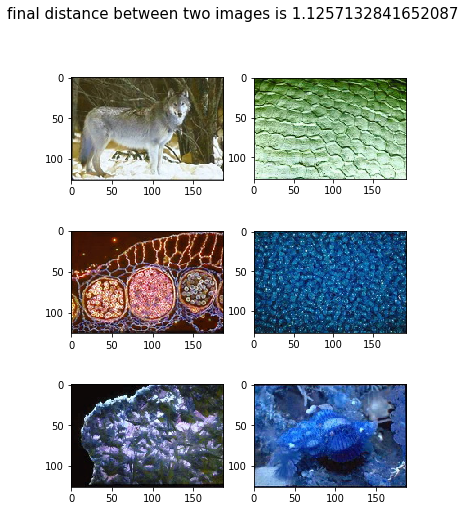

In [16]:
import matplotlib.pyplot as plt

fig,  ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(6,8))
image_output1 = cv2.imread(r"C:/Users/SUPERMAN/Desktop/hand/Corel100000/Corel10000/"+final_list[1])
image_output2 = cv2.imread(r"C:/Users/SUPERMAN/Desktop/hand/Corel100000/Corel10000/"+final_list[2])
image_output3 = cv2.imread(r"C:/Users/SUPERMAN/Desktop/hand/Corel100000/Corel10000/"+final_list[3])
image_input = cv2.imread(input_image)
image_output4 = cv2.imread(r"C:/Users/SUPERMAN/Desktop/hand/Corel100000/Corel10000/"+final_list[4])
image_output5 = cv2.imread(r"C:/Users/SUPERMAN/Desktop/hand/Corel100000/Corel10000/"+final_list[5])

ax2.imshow(image_output1)
ax3.imshow(image_output2)
ax4.imshow(image_output3)
ax5.imshow(image_output4)
ax6.imshow(image_output5)
ax1.imshow(image_input)
plt.suptitle(f"final distance between two images is {final_values[0]}",fontsize=15)
plt.show()